<a href="https://colab.research.google.com/github/RicardxJMG/Clustering-Credit-Card/blob/main/Clustering_Tarjeta_Credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explorando los datos.
En este notebook estaremos analizando patrones en el comportamiento de clientes de tarjeta de crédito empleando un dataset de Kaggle llamado CC GENERAL.csv.

Dicho análisis estará sujeto a los resultados obtenidos a través de una técnica de aprendizaje no supervisada llamada clustering.

Dataset: https://www.kaggle.com/arjunbhasin2013/ccdata

In [18]:
import pandas as pd
dataset = pd.read_csv('CC GENERAL.csv', sep = ',')

In [19]:
dataset.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

Borramos los atributos que no nos interesan como: CUST_ID y TENURE

In [20]:
dataset.drop(columns=['CUST_ID','TENURE'], inplace=True)
dataset.head(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000


In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

Analizando la calidad del dataset

In [22]:
missing = dataset.isna().sum()
missing

,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,0


In [23]:
dataset.fillna(dataset.median(), inplace=True)
missing = dataset.isna().sum()
missing

,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,0


# Análisis Exploratorio

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("deep")

# Preprocesamiento de datos.

In [ ]:
from sklearn.preprocessing import Normalizer

values = Normalizer().fit_transform(dataset.values)
values

array([[3.93555441e-02, 7.87271593e-04, 9.17958473e-02, ...,
        1.94178127e-01, 1.34239194e-01, 0.00000000e+00],
       [2.93875903e-01, 8.34231560e-05, 0.00000000e+00, ...,
        3.76516684e-01, 9.84037959e-02, 2.03923046e-05],
       [3.10798149e-01, 1.24560965e-04, 9.63068011e-02, ...,
        7.74852335e-02, 7.81351982e-02, 0.00000000e+00],
       ...,
       [2.27733092e-02, 8.11060955e-04, 1.40540698e-01, ...,
        7.90986945e-02, 8.02156174e-02, 2.43318384e-04],
       [2.65257948e-02, 1.64255731e-03, 0.00000000e+00, ...,
        1.03579625e-01, 1.09898221e-01, 4.92767391e-04],
       [1.86406219e-01, 3.33426837e-04, 5.46778061e-01, ...,
        3.15915455e-02, 4.41568390e-02, 0.00000000e+00]])

# Validando y visualizando los *clusters*

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics

scores= []

for s in range(3,11):
  score={}
  kmeans = KMeans(n_clusters= s, n_init=10, max_iter= 300)
  y_pred = kmeans.fit_predict(values)
  labels = kmeans.labels_
  score['N_Clusters'] = s
  score['Silhouette'] = metrics.silhouette_score(values, labels, metric='euclidean')
  score['Davies-Bouldin'] = metrics.davies_bouldin_score(values, labels)
  score['Calinski-Harabasz'] = metrics.calinski_harabasz_score(values, labels)
  scores.append(score)

table = pd.DataFrame(scores)
table

,N_Clusters,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,3,0.327220,1.309607,3526.440520
1,4,0.348257,1.221290,3528.717622
2,5,0.364543,1.075813,3431.800541
3,6,0.364903,1.045335,3523.514296
4,7,0.327782,1.150784,3398.395027
5,8,0.309044,1.174164,3239.104412
6,9,0.306398,1.205542,3106.518760
7,10,0.351369,1.117019,3019.203579


In [ ]:
import numpy as np

random_data = np.random.rand(8950,16)

scores= []

for s in range(3,11):
  score={}
  kmeans = KMeans(n_clusters= s, n_init=10, max_iter= 300)
  y_pred = kmeans.fit_predict(random_data)
  labels = kmeans.labels_
  score['N_Clusters'] = s
  score['Silhouette'] = metrics.silhouette_score(random_data, labels, metric='euclidean')
  score['Davies-Bouldin'] = metrics.davies_bouldin_score(random_data, labels)
  score['Calinski-Harabasz'] = metrics.calinski_harabasz_score(random_data, labels)
  scores.append(score)

random_table = pd.DataFrame(scores)
random_table

,N_Clusters,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,3,0.040723,3.963671,379.698868
1,4,0.041660,3.700421,335.841754
2,5,0.040053,3.543126,303.786161
3,6,0.039954,3.326620,280.791379
4,7,0.039941,3.189524,262.076865
5,8,0.040099,3.071052,247.084858
6,9,0.040415,2.980928,234.040066
7,10,0.040871,2.905386,223.660553


### Estabilidad de clusters

In [ ]:
set1,set2,set3 = np.array_split(values,3)
sets = [set1,set2,set3 ]

scores= []
n=1
for set_ in sets:
  score={}
  kmeans = KMeans(n_clusters= 6, n_init=10, max_iter= 300)
  y_pred = kmeans.fit_predict(set_)
  labels = kmeans.labels_
  score['Set'] = f'set{n}'
  n += 1
  score['Silhouette'] = metrics.silhouette_score(set_, labels, metric='euclidean')
  score['Davies-Bouldin'] = metrics.davies_bouldin_score(set_, labels)
  score['Calinski-Harabasz'] = metrics.calinski_harabasz_score(set_, labels)
  scores.append(score)

estability_table = pd.DataFrame(scores)
estability_table

,Set,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,set1,0.364216,1.022584,1192.388843
1,set2,0.363992,1.064383,1169.438499
2,set3,0.372281,1.041536,1184.794637


<function matplotlib.pyplot.show>

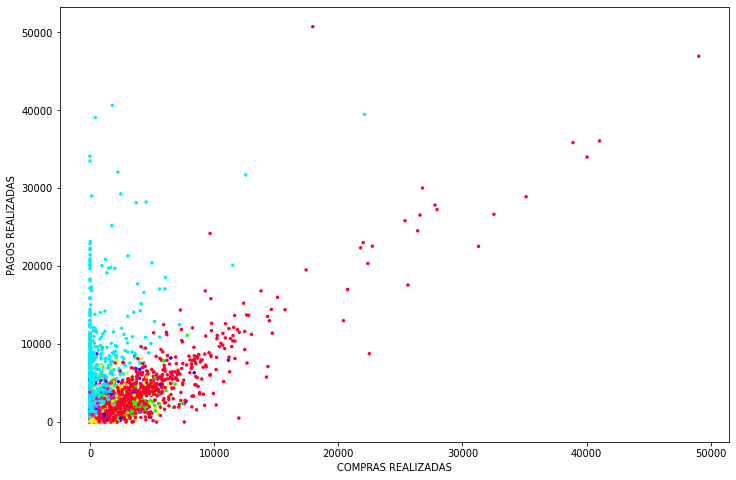

In [ ]:
kmeans = KMeans(n_clusters= 6, n_init=10, max_iter= 300)
y_pred = kmeans.fit_predict(values)
labels = kmeans.labels_

dataset['CLUSTER'] = labels

import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.scatter(dataset['PURCHASES'], dataset['PAYMENTS'], c=labels, s=6, cmap='gist_rainbow')
plt.xlabel('COMPRAS REALIZADAS')
plt.ylabel('PAGOS REALIZADAS')

plt.show

# Entendiendo los valores de los atributos en los *clusters*

In [ ]:
dataset.groupby('CLUSTER').describe()

BALANCE                            ... PRC_FULL_PAYMENT                    
          count         mean          std  ...              50%       75%       max
CLUSTER                                    ...                                     
0        1487.0  1118.416028  1648.962974  ...         0.083333  0.571429  1.000000
1        3203.0   418.043217   797.366382  ...         0.000000  0.454545  1.000000
2        1797.0  3245.188296  2630.078110  ...         0.000000  0.000000  0.090909
3         979.0  1765.701095  2003.410377  ...         0.083333  0.166667  1.000000
4         342.0  1959.062058  1816.549846  ...         0.000000  0.000000  1.000000
5        1142.0  2425.349114  2030.134301  ...         0.000000  0.000000  0.600000

[6 rows x 128 columns]

In [ ]:
kmeans.cluster_centers_

array([[1.54599773e-01, 2.44425945e-04, 4.43775262e-01, 2.60489090e-01,
        1.83463680e-01, 2.62547411e-02, 2.04881464e-04, 8.97966293e-05,
        1.50826491e-04, 9.46179230e-06, 1.73760012e-04, 6.18914156e-03,
        6.03086417e-01, 4.00606243e-01, 8.39467783e-02, 7.31329629e-05],
       [6.51891487e-02, 2.31517721e-04, 1.22178325e-01, 4.79126660e-02,
        7.43682977e-02, 1.96931973e-02, 1.74957103e-04, 3.38268692e-05,
        1.42042228e-04, 7.31609841e-06, 1.14836315e-04, 2.89260277e-03,
        9.45483950e-01, 1.54629404e-01, 5.57959186e-02, 7.79776326e-05],
       [5.61755351e-01, 3.00238566e-04, 8.32300186e-02, 4.70383031e-02,
        3.62295453e-02, 1.05265336e-01, 8.67633056e-05, 3.31513131e-05,
        6.00300755e-05, 4.31455709e-05, 7.55860118e-04, 1.83938142e-03,
        7.20742051e-01, 1.91179024e-01, 2.10549568e-01, 1.15887991e-07],
       [2.29018077e-01, 2.10688475e-04, 6.85886326e-02, 3.88304296e-02,
        2.97639130e-02, 3.65014082e-01, 5.85119017e-05, 2.269

In [ ]:
dataset.drop(columns='CLUSTER', inplace=True)
centroids = pd.DataFrame(kmeans.cluster_centers_, columns= dataset.columns)
round(centroids.var(),3).sort_values(ascending=False)

MINIMUM_PAYMENTS                    0.065
CREDIT_LIMIT                        0.042
CASH_ADVANCE                        0.041
PAYMENTS                            0.036
BALANCE                             0.030
PURCHASES                           0.022
ONEOFF_PURCHASES                    0.008
INSTALLMENTS_PURCHASES              0.004
PRC_FULL_PAYMENT                    0.000
PURCHASES_TRX                       0.000
CASH_ADVANCE_TRX                    0.000
CASH_ADVANCE_FREQUENCY              0.000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000
ONEOFF_PURCHASES_FREQUENCY          0.000
PURCHASES_FREQUENCY                 0.000
BALANCE_FREQUENCY                   0.000
dtype: float64

In [ ]:
dataset['CLUSTER']=labels
description = round(dataset.groupby('CLUSTER')['PURCHASES','BALANCE','CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS' ].mean(),2)
description


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,PURCHASES,BALANCE,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
CLUSTER,,,,,,
0,3328.47,1118.42,185.76,4110.13,3051.12,537.75
1,628.78,418.04,119.40,5132.73,816.71,220.68
2,518.50,3245.19,765.46,4421.34,1052.40,1150.43
3,528.57,1765.70,3085.88,3951.30,4999.03,746.79
4,856.28,1959.06,451.82,2198.68,1339.89,6865.32
5,239.22,2425.35,3109.53,4471.54,976.58,796.02


In [ ]:
description['N_CUSTOMERS'] = dataset.CLUSTER.value_counts()
description

,PURCHASES,BALANCE,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,N_CUSTOMERS
CLUSTER,,,,,,,
0,3328.47,1118.42,185.76,4110.13,3051.12,537.75,1487
1,628.78,418.04,119.40,5132.73,816.71,220.68,3203
2,518.50,3245.19,765.46,4421.34,1052.40,1150.43,1797
3,528.57,1765.70,3085.88,3951.30,4999.03,746.79,979
4,856.28,1959.06,451.82,2198.68,1339.89,6865.32,342
5,239.22,2425.35,3109.53,4471.54,976.58,796.02,1142


# Interpretando los *clusters*

BALANCE : Balance amount left in their account to make purchases (

PURCHASES : Amount of purchases made from account

CASHADVANCE : Cash in advance given by the user

CREDITLIMIT : Limit of Credit Card for user

PAYMENTS : Amount of Payment done by user

MINIMUM_PAYMENTS : Minimum amount of payments made by user

PRCFULLPAYMENT : Percent of full payment paid by user

In [ ]:
description

,PURCHASES,BALANCE,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,N_CUSTOMERS
CLUSTER,,,,,,,
0,3328.47,1118.42,185.76,4110.13,3051.12,537.75,1487
1,628.78,418.04,119.40,5132.73,816.71,220.68,3203
2,518.50,3245.19,765.46,4421.34,1052.40,1150.43,1797
3,528.57,1765.70,3085.88,3951.30,4999.03,746.79,979
4,856.28,1959.06,451.82,2198.68,1339.89,6865.32,342
5,239.22,2425.35,3109.53,4471.54,976.58,796.02,1142


CLUSTER 0:Más realiza gastos con compras. Mejor paga. Tienen un límite de crédito medio.

**CLUSTER 1: Menos saldo disponible para compras. Solicita menos avances en efectivo. Límite de crédito más alto. Paga bien. Grupo más numeroso de clientes** Estrategia para ganar más dinero.

**CLUSTER 2: Tiene más saldo disponible para compras. Peores para pagar.  Segundo límite de crédito más alto.** Estrategia para seleccionar mejor estos clientes y así no tener tantas pérdidas.

CLUSTER 3: Solicitan avances en efectivo. Pagan moderadamente.

CLUSTER 4:Tienen límite de crédito más bajo. No pagan muy bien. Grupo más pequeño de clientes.

CLUSTER 5:Menos realiza gastos con compras.Solicitan más avances en efectivo. Pagan mal.

In [ ]:
dataset.groupby('CLUSTER')['PRC_FULL_PAYMENT'].mean()

CLUSTER
0    0.284099
1    0.252640
2    0.000097
3    0.128703
4    0.022729
5    0.008877
Name: PRC_FULL_PAYMENT, dtype: float64